# Classification de chiffres manuscrits en utilisant le dataset MNIST

## Description

- Dans ce TP nous allons récuperer les images du mnist ou différents chiffres de 1 à 9 sont labelisés.

# Sommaire

#### [Importation](#mon-titre1)
#### [Load Data and normalisation](#mon-titre2)
- [Load data from mnist](#mon-sous-titre21)
- [Normalisation](#mon-sous-titre22)
- [Exemple](#mon-sous-titre23)
#### [Creation of the model](#mon-titre3)
- [Model Representation](#mon-sous-titre31)
- [Layer description](#mon-sous-titre32)
- [Python Model](#mon-sous-titre33)
#### [Compilation of the model](#mon-titre4)
#### [Train](#mon-titre5)
#### [Prediction](#mon-titre6)
- [Show image to predictn](#mon-sous-titre61)
- [Show prediction](#mon-sous-titre62)
- [Show last layer probability](#mon-sous-titre63)





<a id="mon-titre1"></a>
## Importation

In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import seaborn as sns

<a id="mon-titre2"></a>
## Load Data and normalisation

<a id="mon-sous-titre21"></a>
### Load data from mnist

In [36]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

<a id="mon-sous-titre22"></a>
### Normalisation

In [37]:
train_images = train_images / 255.0
test_images = test_images / 255.0

<a id="mon-sous-titre23"></a>
### Example

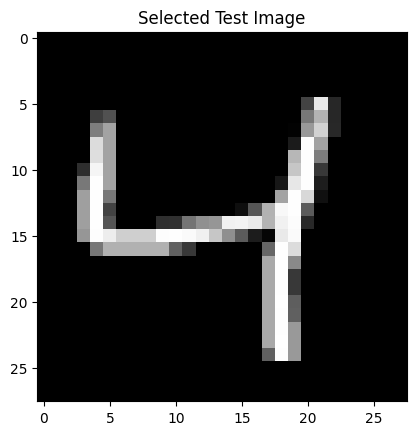

In [38]:
plt.imshow(train_images[2], cmap='gray')
plt.title('Selected Test Image')
plt.show()

<a id="mon-titre3"></a>
## Creation of the model

<a id="mon-sous-titre31"></a>
### Model Representation


<img src="../../images/1_1_model.png" alt="Description alternative de l'image" width="500"/>


<a id="mon-sous-titre32"></a>
### Layers description

<table>
<tr>
    <td style="width: 50%">
        <img src="../../images/Layer_flatten.png" alt="Layer_flatten" style="width: 100%"/>
    </td>
    <td style="width: 50%; vertical-align: top;">
        <h2><strong>Flatten</strong></h2>
        <p><strong>Rôle :</strong> Transforme la matrice 2D (sortie de la couche de pooling) en un vecteur 1D. Cela permet de passer d'une représentation spatiale à une représentation plate, adaptée pour les couches denses.</p>
    </td>
</tr>
<tr>
    <td style="width: 50%">
        <img src="../../images/Layer_dense.png" alt="Layer_dense" style="width: 100%"/>
    </td>
    <td style="width: 50%; vertical-align: top;">
        <h2><strong>Dense</strong></h2>
        <p><strong>Neurones :</strong> 128</p>
        <p><strong>Activation :</strong> 'relu'</p>
        <p><strong>Rôle :</strong> Interprète les caractéristiques apprises par les couches précédentes pour effectuer une classification plus complexe. Les 128 neurones permettent au réseau de créer des combinaisons complexes et non linéaires des caractéristiques extraites.</p>
    </td>
</tr>
</table>


<a id="mon-sous-titre33"></a>
### Python Model

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

<a id="mon-titre4"></a>
## Compilation of the model

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<a id="mon-titre5"></a>
## Train

In [25]:
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0584 - accuracy: 0.9823 - val_loss: 0.0919 - val_accuracy: 0.9719
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0498 - accuracy: 0.9845 - val_loss: 0.0866 - val_accuracy: 0.9724
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0423 - accuracy: 0.9871 - val_loss: 0.0887 - val_accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0915 - val_accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0323 - accuracy: 0.9902 - val_loss: 0.0796 - val_accuracy: 0.9767


<a id="mon-titre6"></a>
## Prediction 

<a id="mon-sous-titre61"></a>
### Show image to predict

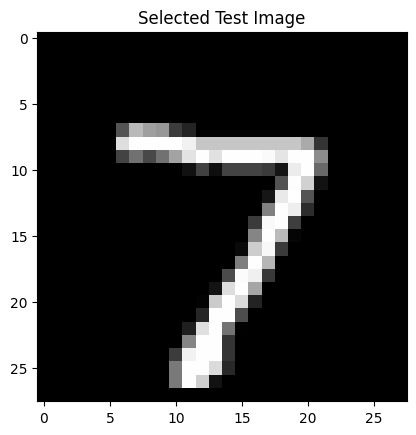

In [26]:
selected_test_image = test_images[0]

plt.imshow(selected_test_image, cmap='gray')
plt.title('Selected Test Image')
plt.show()

<a id="mon-sous-titre62"></a>
### Show prediction

In [27]:
test_img_reshaped = selected_test_image.reshape(1, 28, 28)
prediction = model.predict(test_img_reshaped)

predicted_class = np.argmax(prediction, axis=1)

print("Predicted class:", predicted_class[0])

1/1 [==============================] - 0s 107ms/step
Predicted class: 7


<a id="mon-sous-titre63"></a>
### Show last layer probability

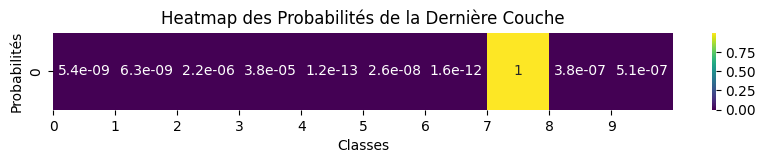

In [28]:
# Utiliser seaborn pour créer une heatmap
plt.figure(figsize=(10, 1))
sns.heatmap(prediction, annot=True, cmap='viridis', cbar=True)
plt.title("Heatmap des Probabilités de la Dernière Couche")
plt.ylabel("Probabilités")
plt.xlabel("Classes")
plt.xticks(np.arange(10), np.arange(10))  # Pour afficher les labels de classes de 0 à 9
plt.show()


